# AVOCADO 가격 예측 (Facebook Prophet ) 



# STEP #0: 데이터셋

- 데이터는 미국의 아보카도 리테일 데이터. (2018년도 weekly 데이터)  
- 아보카도 거래량과 가격이 나와 있다. 

컬럼 설명 :

- Date - The date of the observation
- AveragePrice - the average price of a single avocado
- type - conventional or organic
- year - the year
- Region - the city or region of the observation
- Total Volume - Total number of avocados sold 
- 4046 - Total number of avocados with PLU 4046 sold - PLU는 농산물 코드이다
- 4225 - Total number of avocados with PLU 4225 sold
- 4770 - Total number of avocados with PLU 4770 sold



# STEP #1: 데이터 준비

### Prophet 라이브러리

- install : 
     pip install fbprophet
     
- 위 에러 발생시 : 
    conda install -c conda-forge fbprophet
 

- 레퍼런스 : https://research.fb.com/prophet-forecasting-at-scale/
https://facebook.github.io/prophet/docs/quick_start.html#python-api


In [ ]:
# import libraries 
import pandas as pd  
import numpy as np 
import matplotlib.pyplot as plt 
import random
import seaborn as sns
from fbprophet import Prophet


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
os.chdir('/content/drive/MyDrive/Colab Notebooks/빅데이터 분석/week08')

In [ ]:
# avocado.csv 데이터 읽기
avocado_df =  pd.read_csv('avocado.csv')

# STEP #2: EDA(Exploratory Data Analysis) :  탐색적 데이터 분석

In [ ]:
avocado_df.head(3)

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany


### 필요없는 맨 처음 컬럼을 제거한다.

In [ ]:
avocado_df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [ ]:
avocado_df.drop('Unnamed: 0', axis=1, inplace=True)

In [ ]:
avocado_df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


### 뒤죽박죽인 데이터를 날짜로 정렬한다.

In [ ]:
avocado_df.sort_values(by='Date', ascending='True', inplace=True)

### 날짜별로 가격이 어떻게 변하는지 간단하게 확인한다. (plot 이용)

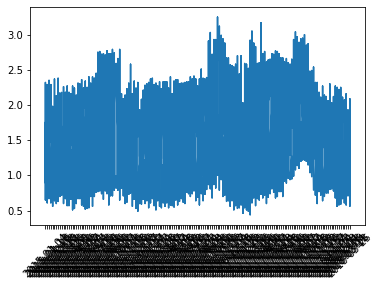

In [ ]:
plt.plot(avocado_df['Date'], avocado_df['AveragePrice'])
plt.xticks(rotation = 45)
plt.show()

### 'region' 별로 데이터 몇개인지 시각화 한다.

In [ ]:
avocado_df.groupby(by='region')['Date'].count()

region
Albany                 338
Atlanta                338
BaltimoreWashington    338
Boise                  338
Boston                 338
BuffaloRochester       338
California             338
Charlotte              338
Chicago                338
CincinnatiDayton       338
Columbus               338
DallasFtWorth          338
Denver                 338
Detroit                338
GrandRapids            338
GreatLakes             338
HarrisburgScranton     338
HartfordSpringfield    338
Houston                338
Indianapolis           338
Jacksonville           338
LasVegas               338
LosAngeles             338
Louisville             338
MiamiFtLauderdale      338
Midsouth               338
Nashville              338
NewOrleansMobile       338
NewYork                338
Northeast              338
NorthernNewEngland     338
Orlando                338
Philadelphia           338
PhoenixTucson          338
Pittsburgh             338
Plains                 338
Portland             

### 년도('year')별로 데이터가 몇건인지 확인한다.

In [ ]:
avocado_df.groupby(by='year')['Date'].count()

year
2015    5615
2016    5616
2017    5722
2018    1296
Name: Date, dtype: int64

### 프로펫 분석을 위해, 두개의 컬럼만 가져온다. ('Date', 'AveragePrice')

In [ ]:
avocado_df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago


In [ ]:
avocado_prophet_df = avocado_df.loc[: , ['Date','AveragePrice']]

# STEP 3: Prophet 을 이용한 예측 수행

### ds 와 y 로 컬럼명을 셋팅한다.

In [ ]:
avocado_prophet_df = avocado_prophet_df.rename(columns={'Date':'ds','AveragePrice':'y'})

### 프로펫 예측 한다.

In [ ]:
avocado_prophet_df.head(2)

,ds,y
11569,2015-01-04,1.75
9593,2015-01-04,1.49


In [61]:
# 365일치를 예측.
m = Prophet()
m.fit(avocado_prophet_df)

future = m.make_future_dataframe(periods=365)
price = m.predict(future)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


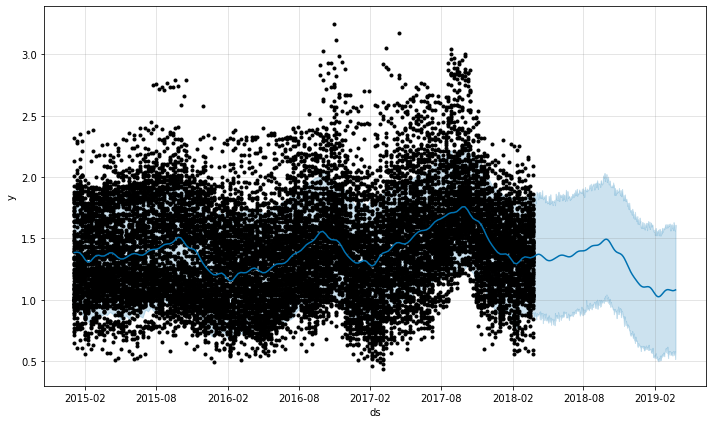

In [ ]:
# 차트로 확인.
fig1 = m.plot(price)

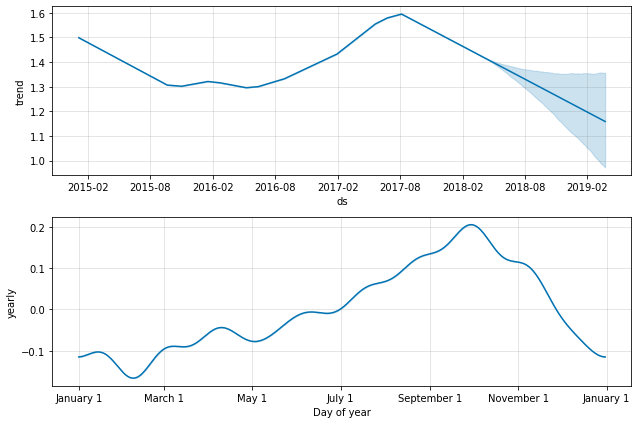

In [ ]:
fig2 = m.plot_components(price)

# PART 2 : region 이 west 인 아보카도의 가격을 예측한다.

In [ ]:
avocado_df.head(2)

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago


In [ ]:
avocado_df_sample = avocado_df.loc[ avocado_df['region']=='West', ['Date','AveragePrice'] ]

In [ ]:
west_df = avocado_df_sample.rename(columns={'Date':'ds','AveragePrice':'y'})

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


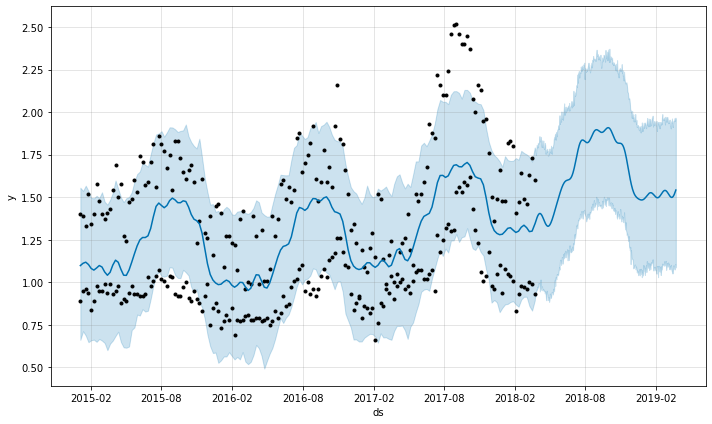

In [ ]:
m2 = Prophet()
m2.fit(west_df)

west_price = m2.make_future_dataframe(365)
future_west_price = m2.predict(west_price)

fig3 = m2.plot(future_west_price)

# 결론 : 전체적인 아보카도 가격은 하락하지만,  웨스트 아보카도를 사면, 비싸게 팔수 있다. 